# Week 6 Notebook 1

## The Requests Library

In this lesson, we will try to make requests to public APIs to collect data.

We will use the Requests library:
1. to call a public API
2. to process the returned response

First, we have to import the `requests` library, which should already be included with your Anaconda distribution. 

In [1]:
import requests

## Sending a Get Request

Let's get the list of public APIs from this [Public APIs site](https://api.publicapis.org/).

Take note of the Base URL in the site: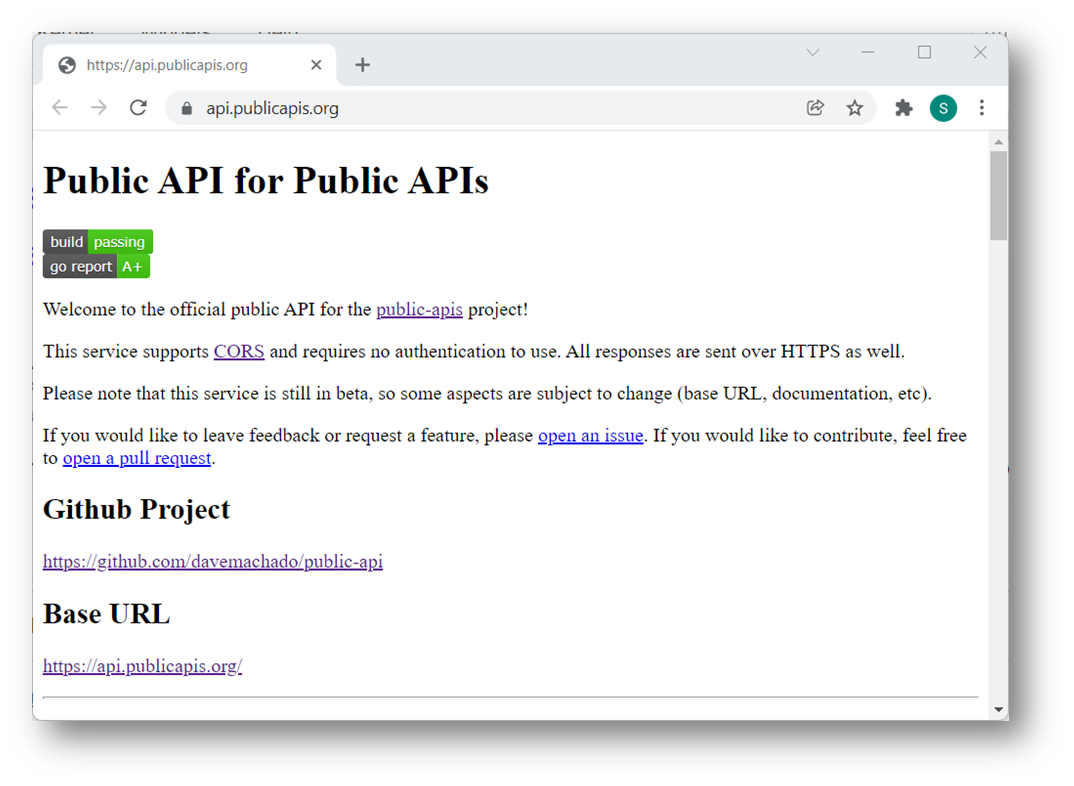

We can see that the base URL for **Public API** is https://api.publicapis.org/.

To send a request, we use the `requests.get()` method with the API endpoint URL as the argument.

Next, we are going to learn how to send a request using an endpoint.

# GET /categories
 
In **Public API**, there is an endpoint called `GET /categories`. This means we can send a **GET** request to `https://api.publicapis.org/categories`. Let's try it out using the `requests.get()` method.

In [2]:
# Send GET request
response = requests.get("https://api.publicapis.org/categories")
print(response.status_code)
print(response.reason)
print(response.text)

200
OK
{"count":51,"categories":["Animals","Anime","Anti-Malware","Art \u0026 Design","Authentication \u0026 Authorization","Blockchain","Books","Business","Calendar","Cloud Storage \u0026 File Sharing","Continuous Integration","Cryptocurrency","Currency Exchange","Data Validation","Development","Dictionaries","Documents \u0026 Productivity","Email","Entertainment","Environment","Events","Finance","Food \u0026 Drink","Games \u0026 Comics","Geocoding","Government","Health","Jobs","Machine Learning","Music","News","Open Data","Open Source Projects","Patent","Personality","Phone","Photography","Programming","Science \u0026 Math","Security","Shopping","Social","Sports \u0026 Fitness","Test Data","Text Analysis","Tracking","Transportation","URL Shorteners","Vehicle","Video","Weather"]}



**Response Status Codes**

As we can see, the `requests.get()` method returns a `response` object. We can retrieve data and information from the `response` object using its' attributes, such as `.status_code`, `.reason`, `.text` and `.headers`.

The status code of `200` means that the request was successful, which is why we obtain the text shown in the response. Let's see the response code for an unsuccessful request.

In [3]:
# Sending a request to an invalid URL
response = requests.get("https://api.publicapis.org/tryforfun")
print(response.status_code)
print(response.reason)
print(response.text)
print(response.headers)

404
Not Found
404 page not found

{'Content-Length': '19', 'Content-Type': 'text/plain; charset=utf-8', 'Date': 'Wed, 06 Apr 2022 13:33:34 GMT', 'Server': 'Caddy', 'X-Content-Type-Options': 'nosniff'}



Because we used a completely made-up URL, the response is `Not Found` with a status code of `404`. We can also see that although the page was not found, the response header contains some information. Let's have a look at the response header for the valid response. 

In [4]:
# Print header for valid response 
response = requests.get("https://api.publicapis.org/categories")
print(response.headers)

{'Access-Control-Allow-Origin': '*', 'Content-Length': '785', 'Content-Type': 'application/json', 'Date': 'Wed, 06 Apr 2022 13:33:35 GMT', 'Server': 'Caddy', 'X-Rate-Limit-Duration': '1', 'X-Rate-Limit-Limit': '10.00', 'X-Rate-Limit-Request-Forwarded-For': '42.191.246.60', 'X-Rate-Limit-Request-Remote-Addr': '172.17.0.1:41930'}


## Decoding the response

We can see that the response header looks like a Python dictionary. Let's take a closer look at the key `Content-Type`. The `Content-Type` key has a value `application/json`, which tells us that the response content is in JSON. This means we can decode the response using the `json()` method.

Let's try it by sending a request again.

In [5]:
# Send the request
response = requests.get("https://api.publicapis.org/categories")

# Decode the JSON response and store in categoryData variable
categoryData = response.json()
print(categoryData)
type(categoryData)

{'count': 51, 'categories': ['Animals', 'Anime', 'Anti-Malware', 'Art & Design', 'Authentication & Authorization', 'Blockchain', 'Books', 'Business', 'Calendar', 'Cloud Storage & File Sharing', 'Continuous Integration', 'Cryptocurrency', 'Currency Exchange', 'Data Validation', 'Development', 'Dictionaries', 'Documents & Productivity', 'Email', 'Entertainment', 'Environment', 'Events', 'Finance', 'Food & Drink', 'Games & Comics', 'Geocoding', 'Government', 'Health', 'Jobs', 'Machine Learning', 'Music', 'News', 'Open Data', 'Open Source Projects', 'Patent', 'Personality', 'Phone', 'Photography', 'Programming', 'Science & Math', 'Security', 'Shopping', 'Social', 'Sports & Fitness', 'Test Data', 'Text Analysis', 'Tracking', 'Transportation', 'URL Shorteners', 'Vehicle', 'Video', 'Weather']}


dict

We can see that after we decoded the response, the `categoryData` data type is a Python dictionary, which means we can proceed to manipulate it using dictionary methods.

In [6]:
# Print the keys and values of the dictionary
for key in categoryData:
    print(key, categoryData[key])

count 51
categories ['Animals', 'Anime', 'Anti-Malware', 'Art & Design', 'Authentication & Authorization', 'Blockchain', 'Books', 'Business', 'Calendar', 'Cloud Storage & File Sharing', 'Continuous Integration', 'Cryptocurrency', 'Currency Exchange', 'Data Validation', 'Development', 'Dictionaries', 'Documents & Productivity', 'Email', 'Entertainment', 'Environment', 'Events', 'Finance', 'Food & Drink', 'Games & Comics', 'Geocoding', 'Government', 'Health', 'Jobs', 'Machine Learning', 'Music', 'News', 'Open Data', 'Open Source Projects', 'Patent', 'Personality', 'Phone', 'Photography', 'Programming', 'Science & Math', 'Security', 'Shopping', 'Social', 'Sports & Fitness', 'Test Data', 'Text Analysis', 'Tracking', 'Transportation', 'URL Shorteners', 'Vehicle', 'Video', 'Weather']


There are two items in this dictionary. 

The first one is the **count** of the categories, or how many categories are available through **Public API**.

The second one is the list of available **categories**.

We can show each of the items in the list by using the `categories` key.

In [7]:
# Print the list of categories which are the values of the key 'categories'
print('Categories Found:\n')
for cat in categoryData['categories']:
    print(cat)

Categories Found:

Animals
Anime
Anti-Malware
Art & Design
Authentication & Authorization
Blockchain
Books
Business
Calendar
Cloud Storage & File Sharing
Continuous Integration
Cryptocurrency
Currency Exchange
Data Validation
Development
Dictionaries
Documents & Productivity
Email
Entertainment
Environment
Events
Finance
Food & Drink
Games & Comics
Geocoding
Government
Health
Jobs
Machine Learning
Music
News
Open Data
Open Source Projects
Patent
Personality
Phone
Photography
Programming
Science & Math
Security
Shopping
Social
Sports & Fitness
Test Data
Text Analysis
Tracking
Transportation
URL Shorteners
Vehicle
Video
Weather


## Passing Parameters

Some APIs return response based on parameters that are received. The parameters for the `/entries` endpoint are listed as follows:

> **GET /entries**

> List all entries currently cataloged in the project

> **Parameters** 

> | Parameter   | Type  | Data Type | Description                                                                      | Required |
|-------------|-------|-----------|----------------------------------------------------------------------------------|----------|
| title       | query | string    | name of entry (matches via substring - i.e. "at" would return "cat" and "atlas") | No       |
| description | query | string    | description of entry (matches via substring)                                     | No       |
| auth        | query | string    | auth type of entry (can only be values matching in project or null)              | No       |
| https       | query | bool      | return entries that support HTTPS or not                                         | No       |
| cors        | query | string    | CORS support for entry ("yes", "no", or "unknown")                               | No       |
| category    | query | string    | return entries of a specific category                                            | No    


Let's say we want to find the entries for 'science' category. To do this, we would pass the parameters 
as a key-value pair, where the key is `category` and the value is `science`.

There are two ways to send a request with parameters using `requests.get()`:
1. form the URL with the parameters after the base URL and endpoint by using a question mark `?` for the query parameters and `&` for each key-value pair, or
2. use the `params` argument and pass a dictionary of key-value pairs

Let's try the first method to find all APIs with the category 'science' from **Public APIs**.


In [8]:
# Send request using parameter in a single URL string
response = requests.get("https://api.publicapis.org/entries?category=science")
print(response.text)

{"count":33,"entries":[{"API":"arcsecond.io","Description":"Multiple astronomy data sources","Auth":"","HTTPS":true,"Cors":"unknown","Link":"https://api.arcsecond.io/","Category":"Science \u0026 Math"},{"API":"arXiv","Description":"Curated research-sharing platform: physics, mathematics, quantitative finance, and economics","Auth":"","HTTPS":true,"Cors":"unknown","Link":"https://arxiv.org/help/api/user-manual","Category":"Science \u0026 Math"},{"API":"CORE","Description":"Access the world's Open Access research papers","Auth":"apiKey","HTTPS":true,"Cors":"unknown","Link":"https://core.ac.uk/services#api","Category":"Science \u0026 Math"},{"API":"GBIF","Description":"Global Biodiversity Information Facility","Auth":"","HTTPS":true,"Cors":"yes","Link":"https://www.gbif.org/developer/summary","Category":"Science \u0026 Math"},{"API":"iDigBio","Description":"Access millions of museum specimens from organizations around the world","Auth":"","HTTPS":true,"Cors":"unknown","Link":"https://gith

Now, let's try calling the API using the `params` keyword argument.
The parameters to be passed are organized in a dictionary.

In [9]:
# Send request using parameter in the 'params' argument
response = requests.get("https://api.publicapis.org/entries", params = {'category':'science'})

# show the URL that was actually used
print(response.url)

https://api.publicapis.org/entries?category=science


You can see that the `response.url` returns the same URL as the first method. 

**Passing more parameters**

Lets' try to pass more parameters. For example, we want the public APIs from the `science` category and no authorization required. So, we need to set up the key-value pairs:
- `category` is `science`
- `auth` is `null`
- `description` contains the word `world`

To do this systematically, first we define the dictionary as an object/variable called `payload`. Then, we pass this variable to the `params` keyword argument. 

In [10]:
# Set up parameter key-value pairs in a dictionary
payload = {'category':'science', 'auth':'null','description':'world'}

# send the request 
response = requests.get("https://api.publicapis.org/entries", params=payload)

# process the response 
free_science_world_api = response.json()
print(free_science_world_api)

# check the URL that was used
print(response.url)

{'count': 2, 'entries': [{'API': 'iDigBio', 'Description': 'Access millions of museum specimens from organizations around the world', 'Auth': '', 'HTTPS': True, 'Cors': 'unknown', 'Link': 'https://github.com/idigbio/idigbio-search-api/wiki', 'Category': 'Science & Math'}, {'API': 'World Bank', 'Description': 'World Data', 'Auth': '', 'HTTPS': True, 'Cors': 'no', 'Link': 'https://datahelpdesk.worldbank.org/knowledgebase/topics/125589', 'Category': 'Science & Math'}]}
https://api.publicapis.org/entries?category=science&auth=null&description=world


We can get the entries returned from the item with the key `entries`.

In [11]:
free_science_world_api['entries']

[{'API': 'iDigBio',
  'Description': 'Access millions of museum specimens from organizations around the world',
  'Auth': '',
  'HTTPS': True,
  'Cors': 'unknown',
  'Link': 'https://github.com/idigbio/idigbio-search-api/wiki',
  'Category': 'Science & Math'},
 {'API': 'World Bank',
  'Description': 'World Data',
  'Auth': '',
  'HTTPS': True,
  'Cors': 'no',
  'Link': 'https://datahelpdesk.worldbank.org/knowledgebase/topics/125589',
  'Category': 'Science & Math'}]

We can see that it returns a list of entries. Each entry is recorded as a dictionary. 

Since `free_science_world_api['entries']` is a list, we can process the list by using a `for` loop to just show the API name and  the link for each entry.

In [12]:
for entry in free_science_world_api['entries']:
    print(entry['API'], entry['Link'])

iDigBio https://github.com/idigbio/idigbio-search-api/wiki
World Bank https://datahelpdesk.worldbank.org/knowledgebase/topics/125589


## Exercises

Let's try sending requests to other **Public API** endpoints.

**Q1 Send Request**

Look for the https://api.publicapis.org/ endpoint that will return the running services' health. Send a request and print the response text!

In [17]:
# Q1 Answer
import requests

# Send a request to get the health status
response = requests.get('https://api.publicapis.org/health')
print(response.text)

{"alive": true}


**Q2 Using Parameters** 

Let's find out what APIs are available for the `Art` category.

Send a request to the `/entries` endpoint using parameters to find the `Art` category entries. Then, decode the response and print the following data:
- API title
- type of `Auth` required
- link to the API.

In [14]:
# Q2 Answer

# Get the entries for the 'Art' category
response = requests.get('https://api.publicapis.org/entries?category=art')

# decode the response and print the data about the available APIs
art = response.json()
for entry in art['entries']:
    print('\nAPI : ',entry['API'])
    print('Authorization Type :', entry['Auth'])
    print('Link :', entry['Link'])


API :  Améthyste
Authorization Type : apiKey
Link : https://api.amethyste.moe/

API :  Art Institute of Chicago
Authorization Type : 
Link : https://api.artic.edu/docs/

API :  Colormind
Authorization Type : 
Link : http://colormind.io/api-access/

API :  ColourLovers
Authorization Type : 
Link : http://www.colourlovers.com/api

API :  Cooper Hewitt
Authorization Type : apiKey
Link : https://collection.cooperhewitt.org/api

API :  Dribbble
Authorization Type : OAuth
Link : https://developer.dribbble.com

API :  EmojiHub
Authorization Type : 
Link : https://github.com/cheatsnake/emojihub

API :  Europeana
Authorization Type : apiKey
Link : https://pro.europeana.eu/resources/apis/search

API :  Harvard Art Museums
Authorization Type : apiKey
Link : https://github.com/harvardartmuseums/api-docs

API :  Icon Horse
Authorization Type : 
Link : https://icon.horse

API :  Iconfinder
Authorization Type : apiKey
Link : https://developer.iconfinder.com

API :  Icons8
Authorization Type : 
Link 

**Q3 Exploring the Met**

One of the available APIs is the [Metropolitan Museum of Art](https://metmuseum.github.io/).
Explore the API and:
1. find the Base URL
2. check the `Search` endpoint
3. check the parameters allowed.

Then, send a request to the `Search` endpoint to get all objects with the following parameter values defined in a dictionary. 
They should be arranged in this order (otherwise, it will not work):
- title is 'true' (the word 'cat' is in the title)
- medium is 'Paintings'
- query value, `q` is 'cat' (search term is 'cat').

Try the examples given from your browser to check it out.

In [15]:
# Q3 Answer

# Set up the parameters
payload = {'title':'true', 'medium':'Paintings', 'q':'cat'}

# Call the API with the parameters
response = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search', params=payload)

# Print the response
print(response.text)

{"total":26,"objectIDs":[486423,53222,461676,435852,482595,49698,49470,488783,752008,19360,57204,486926,36075,481489,50826,54747,49467,54626,459165,437376,36221,19363,72842,49050,36411,73046]}


**Q4 Calling the 'Object' Endoint**

Now that we have the response showing the various art objects that match the search criteria from Question 3, decode the response to get a list of object IDs.

Then, you can use the `Object` endpoint in a `for` loop to print out the following information about each artwork:
- objectID
- Title
- Artist's Display Name
- Image URL
- Department
- Object Date.

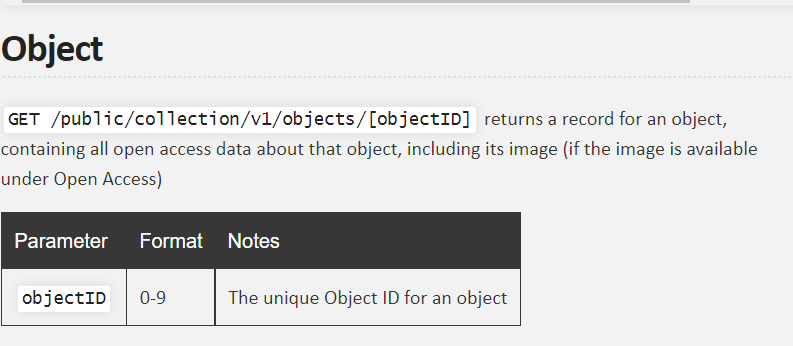

In [16]:
# Q4 Answer

results = response.json()
for ID in results['objectIDs']:
    artwork = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/objects/'+str(ID))
    artInfo = artwork.json()
    print('\nobjectID :', artInfo['objectID'])
    print('Title:', artInfo['title'])
    print('Artist:', artInfo['artistDisplayName'])
    print('Image :', artInfo['primaryImage'])
    print('Department:', artInfo['department'])
    print('Date :',artInfo['objectDate'])


objectID : 486423
Title: Woman with a Cat
Artist: Fernand Léger
Image : 
Department: Modern and Contemporary Art
Date : 1921

objectID : 53222
Title: Musk Cat
Artist: Uto Gyoshi
Image : https://images.metmuseum.org/CRDImages/as/original/DP361166.jpg
Department: Asian Art
Date : mid–late 16th century

objectID : 461676
Title: Cat and Turtle
Artist: Vicente do Rego Monteiro
Image : 
Department: Robert Lehman Collection
Date : 1925

objectID : 435852
Title: Two Children Teasing a Cat
Artist: Annibale Carracci
Image : https://images.metmuseum.org/CRDImages/ep/original/DP243404.jpg
Department: European Paintings
Date : 

objectID : 482595
Title: Cat
Artist: Walasse Ting
Image : 
Department: Modern and Contemporary Art
Date : 1957

objectID : 49698
Title: Cat
Artist: Zhang Yuguang
Image : 
Department: Asian Art
Date : 20th century

objectID : 49470
Title: Cat
Artist: Wang Li
Image : https://images.metmuseum.org/CRDImages/as/original/DP-14880-002.jpg
Department: Asian Art
Date : 

objectID :

KeyError: 'objectID'